In [75]:
import pandas as pd
import numpy as np
import itertools
import nltk
import copy

In [83]:
class NBC():
    def add_data(self, datas):
        word_column = datas.columns[1]
        target_column = datas.columns[2]
        target_ls = list(set(datas[target_column]))
        datas[word_column] = list(map(lambda i : i.split(','), datas[word_column]))
        total_ngram = list(itertools.chain(*list(datas[word_column]))) # list로 들어가지 않을 경우
        unique_ngram = list(set(total_ngram))
        result_df = pd.DataFrame(unique_ngram, columns = [word_column]).set_index(word_column)
        for target in target_ls:
            this_ngram = list(itertools.chain(*list(datas[datas[target_column] == target][word_column])))
            fdist = nltk.FreqDist(this_ngram)
            temp_df = pd.DataFrame(list(zip(fdist.keys(), fdist.values())), columns= [word_column, 'count']).set_index(word_column)
            result_df[target] = temp_df['count']
            
        result_df.fillna(0, inplace=True)
        result_df['score'] = 0
        self.df = copy.deepcopy(result_df)
        return self.df
    
    def count_vec(self, datas):
        word_column = datas.columns[0]
        target_column = datas.columns[1]
        target_ls = list(set(datas[target_column]))

        total_ngram = list(itertools.chain(*list(datas[word_column]))) 
        unique_ngram = list(set(total_ngram))
        result_df = pd.DataFrame(unique_ngram, columns = [word_column]).set_index(word_column)
        
        for target in target_ls:
            this_ngram = list(itertools.chain(*list(datas[datas[target_column] == target][word_column])))
            fdist = nltk.FreqDist(this_ngram)
            temp_df = pd.DataFrame(list(zip(fdist.keys(), fdist.values())), columns= [word_column, 'count']).set_index(word_column)
            result_df[target] = temp_df['count']

        result_df.fillna(0, inplace=True)
        return result_df
    
    def polarity_score(self, datas):
        df = datas
        
        df['haw'] = df[1] / sum(df[1])
        df['dov'] = df[-1] / sum(df[-1])
        self.df['score'] += df['haw'] / df['dov']
        return self.df

    def bagging(self, train_data, k):
        for i in range(k):
            self.polarity_score(self.count_vec(train_data.sample(frac=0.9)))
        self.df['score'] = self.df['score'] / k
        return self.df

In [85]:
df = pd.read_json('ngram_treasury3.json')
df

,date,ngram,ud
0,2005-05-12,"부진/NNG;글로벌/NNG;경기/NNG;둔화/NNG;우려/NNG,소비/NNG;설비/...",-1
1,2005-06-09,"경상/NNG;수지/NNG;적자/NNG;재정/NNG;적자/NNG,국제/NNG;금융시장...",1
2,2005-06-23,"대출/NNG;촉진/NNG,걸림돌/NNG,개선/NNG",1
3,2005-07-07,"자산/NNG;가격/NNG;상승/NNG;물가/NNG;상승/NNG,물가/NNG;안정/N...",1
4,2005-08-11,"부동산/NNG;가격/NNG;상승/NNG;금리/NNG;인상/NNG,국채/NNG;수익률...",1
...,...,...,...
292871,2020-06-03,"재정/NNG;건전성/NNG;악화/NNG,재정/NNG;건전성/NNG;확보/NNG,시중...",0
292872,2020-06-03,최대/NNG,0
292873,2020-06-03,"재정/NNG;건전성/NNG;우려/NNG,금리/NNG;유가/NNG;하락/NNG,적자국...",0
292874,2020-06-03,"재정/NNG;건전성/NNG;악화/NNG,재정/NNG;건전성/NNG;확보/NNG,시중...",0


In [86]:
nbc = NBC()
df = nbc.add_data(df)

In [87]:
df # --> 칼럼 다 합쳐서 빈도수가 15 미만인 값 잘라내고 fit함수실행

,0,1,-1,score
ngram,,,,
금리/NNG;상승/NNG;상환/NNG;부담/NNG,2.0,1.0,3.0,0
성장/NNG;신흥국/NNG;성장/NNG,0.0,0.0,2.0,0
둔화/NNG;서브프라임/NNG;부실/NNG,0.0,4.0,4.0,0
개선/NNG;글로벌/NNG;금리/NNG;상승/NNG,0.0,2.0,1.0,0
안정/NNG;토끼/NNG;잡/VV,3.0,4.0,2.0,0
...,...,...,...,...
신용/NNG;개선/NNG,17.0,22.0,30.0,0
경기/NNG;악재/NNG,6.0,13.0,13.0,0
금리/NNG;미리/MAG;오르/VV,1.0,5.0,3.0,0


In [71]:
df1['sum'] = df1.sum(axis=1)

In [72]:
df1

,0,1,-1,sum
ngram,,,,
금리/NNG;상승/NNG;상환/NNG;부담/NNG,2.0,1.0,3.0,6.0
성장/NNG;신흥국/NNG;성장/NNG,0.0,0.0,2.0,2.0
둔화/NNG;서브프라임/NNG;부실/NNG,0.0,4.0,4.0,8.0
개선/NNG;글로벌/NNG;금리/NNG;상승/NNG,0.0,2.0,1.0,3.0
안정/NNG;토끼/NNG;잡/VV,3.0,4.0,2.0,9.0
...,...,...,...,...
신용/NNG;개선/NNG,17.0,22.0,30.0,69.0
경기/NNG;악재/NNG,6.0,13.0,13.0,32.0
금리/NNG;미리/MAG;오르/VV,1.0,5.0,3.0,9.0


In [73]:
df1 = df1[df1['sum'] > 15]

In [74]:
df1 # 빈도수 15초과인 ngram들만 추출한 데이터프레임

,0,1,-1,sum
ngram,,,,
단기자금/NNG;넘/VV,6.0,26.0,13.0,45.0
역외/NNG;상승/NNG,8.0,5.0,9.0,22.0
투자/NNG;약세/NNG,2.0,5.0,11.0,18.0
작/VA;않/VX;금리/NNG;인하/NNG,6.0,13.0,14.0,33.0
우려/NNG;경감/NNG,71.0,69.0,137.0,277.0
...,...,...,...,...
위기/NNG;공포/NNG,7.0,7.0,11.0,25.0
최대/NNG;인상/NNG,7.0,22.0,37.0,66.0
만만/NNG;않/VX;금리/NNG;인상/NNG,7.0,12.0,8.0,27.0


In [96]:
# 확률계산(n=train 횟수))
def fit(df1, n):
    # 평균을 내기 위한 데이터 저장소
    df_columns = df1.columns
    for_avg = df1.drop(columns=df_columns, axis = 1)
    # 데이터 스플릿
    for i in range(n):
        # 임의의 90% 데이터 추출
        train = df1.sample(frac=0.9)
        # fit 수행
        train['whokish'] = ((train[1])/(sum(train[1])))
        train['wdovish'] = ((train[-1])/(sum(train[-1])))
        train['score{}'.format(i)] = train['whokish']/train['wdovish']
        for_avg = pd.merge(for_avg, train['score{}'.format(i)], left_index=True, right_index=True, suffixes=('_',''), how='outer')
        try:
            for_avg.drop('score{}_'.format(i), axis=1, inplace=True)
        except:
            pass
    df1['avg_score'] = for_avg.mean(axis=1)
    return df1['avg_score']

In [97]:
df1 = fit(df1, 30) # bagging

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [206]:
df1 = pd.DataFrame(df1, columns = ['avg_score'])
df1

,avg_score
ngram,
단기자금/NNG;넘/VV,2.691417
역외/NNG;상승/NNG,0.747495
투자/NNG;약세/NNG,0.611676
작/VA;않/VX;금리/NNG;인하/NNG,1.249388
우려/NNG;경감/NNG,0.677641
...,...
위기/NNG;공포/NNG,0.856203
최대/NNG;인상/NNG,0.800066
만만/NNG;않/VX;금리/NNG;인상/NNG,2.018071


In [106]:
def classify(df):
    df['HD'] = list(map(lambda i: 'H' if i>1.3 else 'D' if i<10/13 else np.nan, df['avg_score']))
    
    return df
df1 = classify(df1)

In [111]:
hawkish = df1[df1['HD'] == 'H'].index

In [112]:
hawkish

Index(['단기자금/NNG;넘/VV', '경기/NNG;물가/NNG;안정/NNG', '개선/NNG;힘입/VV;회복/NNG',
       '기업/NNG;수익/NNG;감소/NNG', '하락/NNG;힘들/VA', '달러원/NNG;하향/NNG;압력/NNG',
       '대출/NNG;여력/NNG;줄/VV', '소비자/NNG;물가/NNG;근원/NNG;상승/NNG',
       '부정적/VAX;영향/NNG;제한적/VAX', '자금/NNG;조달/NNG;실패/NNG',
       ...
       '국제/NNG;유가/NNG;내림/NNG', '재정/NNG;건전성/NNG;개선/NNG', 'rbc비율/NNG;개선/NNG',
       '우려/NNG;콜/NNG;금리/NNG;인상/NNG', '장기물/NNG;줄/VV',
       '경제/NNG;성장률/NNG;예상/NNG;둔화/NNG', '어렵/VA;물가/NNG;상승/NNG', '단기/NNG;어렵/VA',
       '만만/NNG;않/VX;금리/NNG;인상/NNG', '경기/NNG;악재/NNG'],
      dtype='object', name='ngram', length=7429)

In [113]:
dovish = df1[df1['HD'] == 'D'].index

In [114]:
dovish

Index(['역외/NNG;상승/NNG', '투자/NNG;약세/NNG', '우려/NNG;경감/NNG', '저금리/NNG;높/VA',
       '물가/NNG;상승/NNG;주춤/NNG', '거시/NNG;지표/NNG;개선/NNG', '실망/NNG;혼조/NNG',
       '경착륙/NNG;피하/VV', '지정학/NNG;불안정/NNG;유가/NNG;상승/NNG', '아웃풋갭/NNG;마이너스/NNG',
       ...
       '도산/NNG;막/VV', '체감/NNG;경기/NNG;좋/VA;않/VX', '글로벌/NNG;금융안정/NNG',
       '가격/NNG;변동/NNG;확대/NNG', '인하/NNG;기대/NNG;희석/NNG',
       'fed/NNG;예상/NNG;빨리/MAG;금리/NNG;인상/NNG', '체감/NNG;경기/NNG;최저/NNG',
       '강하/VA;주가/NNG;상승/NNG', '재무/NNG;취약/NNG',
       '신흥국/NNG;금융시장/NNG;변동성/NNG;확대/NNG'],
      dtype='object', name='ngram', length=7973)

In [195]:
import datetime
test_data = pd.read_json('test_ngram_datas.json')
test_data['ngram'] = list(map(lambda i : i.split(','), test_data['ngram']))
test_data['date'] = list(map(lambda i : i.date(), test_data['date']))
test_data = test_data[test_data['date']<= datetime.date(2017,12,31)]

In [196]:
test_data # 의사록 n-gram(testdata)

,date,ngram
6251,2017-12-28,[물가/NNG;안정/NNG]
6252,2017-12-28,"[금융안정/NNG;위험/NNG, 위험/NNG;성장/NNG]"
6253,2017-12-28,[통화정책/NNG;완화/NNG]
6254,2017-12-28,[금융시스템/NNG;안정/NNG]
6255,2017-12-14,[금융안정/NNG]
...,...,...
29417,2005-05-12,"[둔화/NNG;경제/NNG;지표/NNG;부진/NNG, 지수/NNG;경제/NNG;지표..."
29418,2005-05-12,"[기업/NNG;실적/NNG;부진/NNG;하락/NNG, 우려/NNG;기업/NNG;실적..."
29419,2005-05-12,"[금리/NNG;인상/NNG;전망/NNG;상승/NNG, 유로존/NNG;경제/NNG;부..."
29420,2005-05-12,"[금리/NNG;경제/NNG;지표/NNG;부진/NNG;하락/NNG, 안전자산/NNG;..."


In [183]:
test_date_list = list(set(list(test_data['date'])))
final_test = pd.DataFrame(test_date_list, columns=['date'])

final_test.set_index('date', inplace=True)
final_test.sort_index(inplace=True)

# Ngram 하루에 합침 (최종 테스트 데이터)
final_test['ngram'] = list(map(lambda i : list(itertools.chain(*test_data[test_data['date'] == i]['ngram'])), test_date_list))

In [197]:
# hawkish, dovish 사전 필요
# 0으로 나눠지는 값의 의미 = hawkish, dovish 사전에 아예 없음을 의미함
# 해당 부분은 드랍하는 것이 맞을 듯
def tone_sent(x):
    a = 0
    b = 0
    for ngram in x:
        if ngram in hawkish:
            a += 1
        elif ngram in dovish:
            b += 1
    if a+b < 5:
        return np.nan
    try:
        return (a-b) / (a+b)
    except:
        return np.nan

In [187]:
# Tone 계산 (일자 Ngram 합친 문서 Tone 계산 1회)
final_test['tone'] = list(map(tone_sent, final_test['ngram']))
tone_data = final_test.dropna()
tone_data['rate'] = sr_df['rate']

In [177]:
# 상관분석
corr = tone_data[['tone','rate']].corr(method = 'pearson')
print(corr)

         tone     rate
tone  1.00000 -0.04497
rate -0.04497  1.00000


In [198]:
test_data['tone'] = list(map(tone_sent, test_data['ngram']))
test_data.dropna(inplace=True)
# 0은 중립
test_data['HD'] = list(map(lambda i : 'H' if i > 0 else 'D' if i < 0 else np.nan, test_data['tone']))
test_data.dropna(inplace=True)
test_data['H'] = list(map(lambda i : 1 if i == 'H' else 0, test_data['HD']))
test_data['D'] = list(map(lambda i : 1 if i == 'D' else 0, test_data['HD']))
final_tone = test_data.groupby('date').sum()[['H','D']]
final_tone['tone'] = (final_tone['H'] - final_tone['D']) / (final_tone['H'] + final_tone['D'])

sr_df = pd.read_json('standard_rate.json').set_index('date')
final_tone['rate'] = sr_df['rate']
corr = final_tone[['tone','rate']].corr(method = 'pearson')
print(corr)

          tone      rate
tone  1.000000  0.454599
rate  0.454599  1.000000


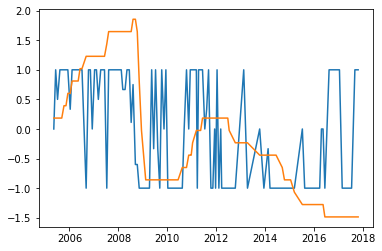

In [205]:
#Scaler
# MaxAbsScaler RobustScaler StandardScaler MinMaxScaler
import pandas as pd
from sklearn import preprocessing
x = final_tone['rate'].values.reshape(-1, 1) #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
final_tone['rate'] = x_scaled

import matplotlib.pyplot as plt
plt.plot(final_tone['tone'])
plt.plot(final_tone['rate'])
plt.show()